In [1]:
#
# Working through the example from
# https://github.com/kwmcbride/kipet_examples/blob/master/examples/example_7/Ex_7_concentration_input.py
#

In [12]:
import sys
import kipet
import numpy as np

import matplotlib.pyplot as plt

In [30]:
r1 = kipet.ReactionModel('reaction-1')   

# Add the model parameters
k1 = r1.parameter('k1', value=2.0, bounds=(0.0, 5.0))
k2 = r1.parameter('k2', value=0.2, bounds=(0.0, 2.0))

# Declare the components and give the initial values
A = r1.component('A', value=0.001, known = False, bounds = (0.0, 3))
B = r1.component('B', value=0.0)
C = r1.component('C', value=0.0)

In [31]:
filename = '/home/paperspace/learn_kipet/data_sets/Ex_1_C_data.txt'
data = kipet.read_data(filename)
data = data.iloc[::10,]
data.head()

,A,B,C
0.0000,0.001027,0.000000,0.000013
0.3334,0.000928,0.000081,0.000009
0.6668,0.000847,0.000127,0.000030
1.0002,0.000788,0.000144,0.000069
1.3336,0.000733,0.000148,0.000117


In [32]:
r1.add_data(data = data, remove_negatives = True)

In [33]:
# Define the reaction model

rate1 = k1 * A
rate2 = k2 * B

r1.add_ode('A', -rate1)
r1.add_ode('B', rate1 - rate2)
r1.add_ode('C', rate2)

In [34]:
# Settings
r1.settings.collocation.nfe = 60

In [27]:
#r1._create_pyomo_model()

ReactionModel: Generating base model (self._model)
# TemplateBuilder: Preparing model for p_estimator
# TemplateBuilder: Preparing model for None


In [28]:
#r1._model.Z.pprint()

Z : Size=90, Index=Z_index
    Key           : Lower : Value : Upper : Fixed : Stale : Domain
       (0.0, 'A') :  None : 0.001 :  None : False : False :  Reals
       (0.0, 'B') :  None :   0.0 :  None : False : False :  Reals
       (0.0, 'C') :  None :   0.0 :  None : False : False :  Reals
    (0.3334, 'A') :  None :     1 :  None : False : False :  Reals
    (0.3334, 'B') :  None :     1 :  None : False : False :  Reals
    (0.3334, 'C') :  None :     1 :  None : False : False :  Reals
    (0.6668, 'A') :  None :     1 :  None : False : False :  Reals
    (0.6668, 'B') :  None :     1 :  None : False : False :  Reals
    (0.6668, 'C') :  None :     1 :  None : False : False :  Reals
    (1.0002, 'A') :  None :     1 :  None : False : False :  Reals
    (1.0002, 'B') :  None :     1 :  None : False : False :  Reals
    (1.0002, 'C') :  None :     1 :  None : False : False :  Reals
    (1.3336, 'A') :  None :     1 :  None : False : False :  Reals
    (1.3336, 'B') :  None :     1 :

In [35]:
# Run KIPET
r1.settings.solver.linear_solver = 'ma27'
r1.run_opt()

########################################
# KIPET version 1.0.3
# Date: 2021-07-07-14-01-25
# File: <ipython-input-30-2817399ead59>
# ReactionModel instance: reaction-1
########################################

# Simulator: Initializing with starting values
# Simulator: Using the fe method
# Simulator: Setting up simulation model
# TemplateBuilder: Preparing model for simulator
# Simulator: Finished creating simulator
# Simulator: Completed successfully

# VarianceEstimator: All variances provided / concentration problem

# ParameterEstimator: Creating instance

# Warning: Template already populated
ReactionModel: Generating base model (self._model)
# TemplateBuilder: Preparing model for p_estimator
# TemplateBuilder: Preparing model for p_estimator
# ParameterEstimator: The variances being used are:
 {'A': 1, 'B': 1, 'C': 1}
# ParameterEstimator: Solving the parameter fitting problem...

    model.name="unknown";
      - termination condition: other
      - message from solver: <undefi

Exception: The current iteration was unsuccessful.

In [24]:
# Display the results
r1.results.show_parameters


The estimated parameters are:
k1 0.22542015491643033
k2 1.0168384088353823


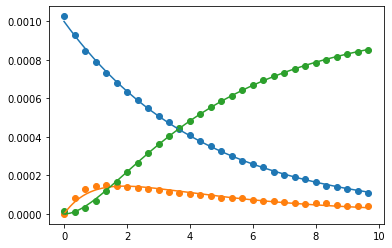

In [25]:
fig, ax = plt.subplots()
for c in ['A','B','C']:
    ax.plot(r1.results.Z.index, r1.results.Z[c])
    ax.scatter(r1.results.Cm.index, r1.results.Cm[c])

In [ ]:
r1.plot(jupyter=True)

In [26]:
r1.results


RESULTS
Z:
                  A         B             C
0.000000  0.001000  0.000000  0.000000e+00
0.025847  0.000994  0.000006  7.598508e-08
0.107513  0.000976  0.000023  1.267243e-06
0.166700  0.000963  0.000034  2.974359e-06
0.192547  0.000958  0.000039  3.927029e-06
...            ...       ...           ...
9.442713  0.000119  0.000034  8.471165e-04
9.501900  0.000117  0.000033  8.491418e-04
9.527747  0.000117  0.000033  8.500179e-04
9.609413  0.000115  0.000033  8.527526e-04
9.668600  0.000113  0.000032  8.547034e-04

[181 rows x 3 columns]

Cm:
                A         B         C
0.0000  0.001027  0.000000  0.000013
0.3334  0.000928  0.000081  0.000009
0.6668  0.000847  0.000127  0.000030
1.0002  0.000788  0.000144  0.000069
1.3336  0.000733  0.000148  0.000117
1.6670  0.000682  0.000147  0.000166
2.0004  0.000634  0.000142  0.000218
2.3338  0.000592  0.000136  0.000265
2.6672  0.000549  0.000128  0.000317
3.0006  0.000509  0.000124  0.000361
3.3340  0.000475  0.000116  0.0004

In [29]:
r1.results.Cm.index

Float64Index([   0.0, 0.3334, 0.6668, 1.0002, 1.3336,  1.667, 2.0004, 2.3338,
              2.6672, 3.0006,  3.334, 3.6674, 4.0008, 4.3342, 4.6676,  5.001,
              5.3344, 5.6678, 6.0012, 6.3346,  6.668, 7.0014, 7.3348, 7.6682,
              8.0016,  8.335, 8.6684, 9.0018, 9.3352, 9.6686],
             dtype='float64')

In [30]:
r1.results.Z.index

Float64Index([     0.0, 0.025847, 0.107513,   0.1667, 0.192547, 0.274213,
                0.3334, 0.359247, 0.440913,   0.5001,
              ...
                9.1685, 9.194347, 9.276013,   9.3352, 9.361047, 9.442713,
                9.5019, 9.527747, 9.609413,   9.6686],
             dtype='float64', length=181)

In [33]:
tmp = np.isin(r1.results.Z.index, r1.results.Cm.index)

In [35]:
Zpred = r1.results.Z[tmp]

In [36]:
Zpred.shape, r1.results.Cm.shape

((30, 3), (30, 3))

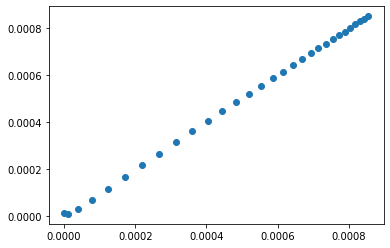

In [47]:
fig, ax = plt.subplots()
ax.scatter(Zpred['C'].values, r1.results.Cm['C'])